In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib as mpl

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
backcall            0.1.0
cached_property     1.5.2
cairo               1.18.1
cffi                1.13.2
cloudpickle         1.2.2
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.0
dask                2.4.0
dateutil            2.8.0
decorator           4.4.0
get_version         2.1
h5py                3.1.0
igraph              0.7.1
ipykernel           5.1.2
ipython_genutils    0.2.0
ipywidge

In [4]:
adata = sc.read('/lustre/scratch126/cellgen/team298/hg6/Fetal_skin/data/fetalskin_all_new4.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 186533 × 28885
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation', 'independent_annotation_refined_20220201a', 'independent_annotation_refined_20220201b', 'independent_annotation_broad1_20220201', 'independent_annotation_broad2_20220201', 'independent_annotation_broad3_20220201', 'joint_annotation_20220201a', 'joint_annotation_20220201b', 'fig1b_annotation_20220201', 'independent_annotation_refined_20220202', 'fig1b_annotation_20220202', 'joint_annotation_20220202'
    var: 'gene_ids', 'mit

In [7]:
adata.obs.joint_annotation_20220202.unique()

[LYVE1++ macrophage, Monocyte (activated/differentiating), Eo/baso/mast cell progenitor, DC2, TREM2+ macrophage, ..., Placode/matrix, POSTN+ basal, Suprabasal IFE, Companion layer, Inner root sheath]
Length: 83
Categories (83, object): [LYVE1++ macrophage, Monocyte (activated/differentiating), Eo/baso/mast cell progenitor, DC2, ..., POSTN+ basal, Suprabasal IFE, Companion layer, Inner root sheath]

In [8]:
%run /home/jovyan/Projects/Skin/Fetal_skin/June2021/_markers.py

In [9]:
mkst = calc_marker_stats(adata, 'joint_annotation_20220202')

In [10]:
mkst[2]

,top_frac_group,top_frac,frac_diff,max_frac_diff,top_mean_group,top_mean,mean_diff,max_mean_diff
RP11-34P13.3,HSC,0.008929,7.387739e-03,7.440476e-03,HSC,0.005314,0.003826,0.003893
RP11-34P13.7,Melanoblast,0.015789,9.460360e-03,1.000913e-02,Melanoblast,0.004822,0.000616,0.002621
RP11-34P13.8,MHCII+ macrophage,0.000455,1.383157e-04,3.523125e-04,MHCII+ macrophage,0.000234,0.000032,0.000139
FO538757.3,Megakaryocyte,0.063584,2.987595e-02,4.275048e-02,Megakaryocyte,0.019730,0.012174,0.014001
FO538757.2,MEMP - Early erythroid,0.550562,1.505618e-01,1.719610e-01,Neutrophil1,0.091612,0.014356,0.022401
AP006222.2,HOXC5+ early fibroblast,0.227234,6.498257e-03,4.066688e-02,HOXC5+ early fibroblast,0.065318,0.008417,0.012234
RP4-669L17.2,Inner root sheath,0.055556,2.222222e-02,4.901961e-02,Inner root sheath,0.048743,0.028588,0.042207
RP4-669L17.10,Early endothelial cells,0.021277,7.004641e-04,5.891980e-03,Mast cell (earliest),0.006690,0.001509,0.001899
RP5-857K21.4,PID1+ schwann cellls,0.018987,6.641663e-03,7.381926e-03,PID1+ schwann cellls,0.012767,0.007941,0.008810
RP5-857K21.2,Periderm,0.019608,1.960784e-02,1.960784e-02,Periderm,0.014608,0.014608,0.014608


In [11]:
import os

In [12]:
os.getcwd()

'/home/jovyan/Projects/Skin/Fetal_skin/MS_scripts'

In [13]:
os.chdir('/home/jovyan/Projects/Skin/Fetal_skin//MS_scripts/')

/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"


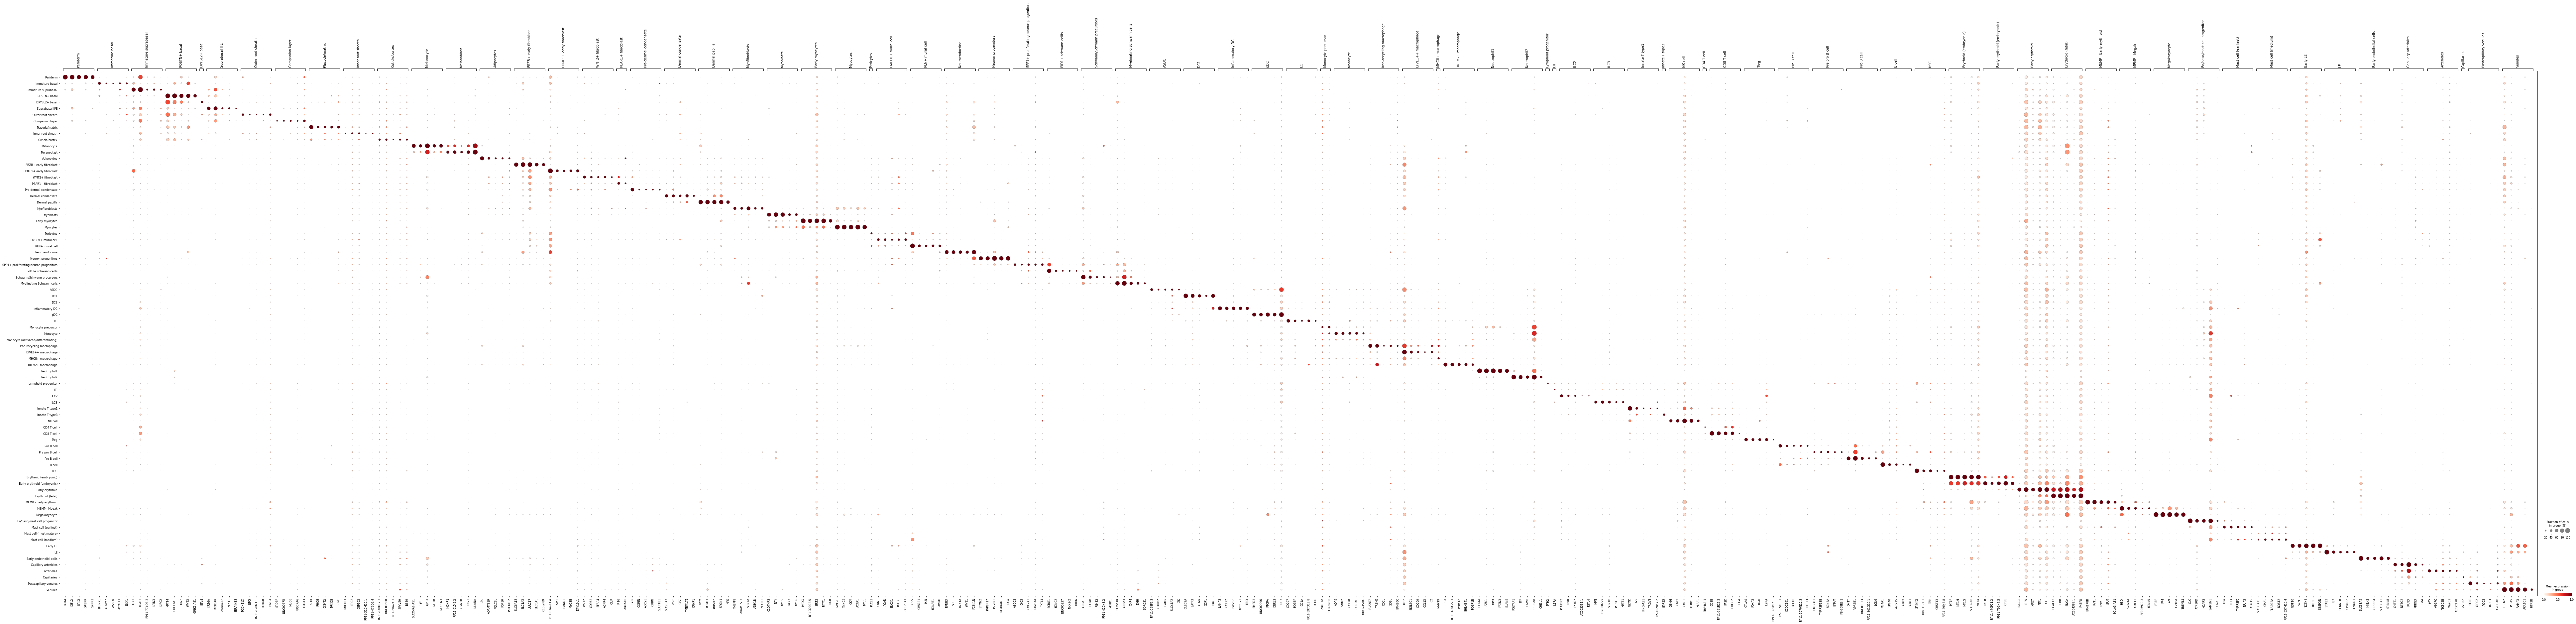

In [14]:
mks = filter_marker_stats(mkst[2], max_next_frac=0.2, min_mean_diff=0.3, how='or')
plot_markers(adata, 'joint_annotation_20220202', mks, standard_scale='var', save='dotplot_all_fetal_skin_joint_annotation_20220202.pdf') 

In [15]:
def test_markers(ad, mks, groupby, n_genes=100, use_raw=True, **kwargs):
    genes = top_markers(mks, top_n=n_genes)
    aux_ad = anndata.AnnData(
        X=ad.raw.X if use_raw else ad.X,
        obs=ad.obs.copy(),
        var=ad.raw.var.copy() if use_raw else ad.var.copy()
    )
    aux_ad = aux_ad[:, genes].copy()
    sc.tl.rank_genes_groups(aux_ad, groupby=groupby, n_genes=n_genes, use_raw=False, **kwargs)
    de_tbl = extract_de_table(aux_ad.uns['rank_genes_groups'])
    return mks.reset_index().rename(columns={'index': 'genes', 'top_frac_group': 'cluster'}).merge(
        de_tbl[['cluster', 'genes', 'logfoldchanges', 'pvals', 'pvals_adj']], how='left'
    )

def extract_de_table(de_dict):
    """
    Extract DE table from adata.uns
    """
    if de_dict['params']['method'] == 'logreg':
        requested_fields = ('scores',)
    else:
        requested_fields = ('scores', 'logfoldchanges', 'pvals', 'pvals_adj',)
    gene_df = _recarray_to_dataframe(de_dict['names'], 'genes')[
        ['cluster', 'rank', 'genes']]
    gene_df['ref'] = de_dict['params']['reference']
    gene_df = gene_df[['cluster', 'ref', 'rank', 'genes']]
    de_df = pd.DataFrame({
        field: _recarray_to_dataframe(de_dict[field], field)[field]
        for field in requested_fields if field in de_dict
    })
    de_tbl = gene_df.merge(de_df, left_index=True, right_index=True)
    de_tbl = de_tbl.loc[de_tbl.genes.astype(str) != 'nan', :]
    return de_tbl


def _recarray_to_dataframe(array, field_name):
    return pd.DataFrame(array).reset_index().rename(
        columns={'index': 'rank'}).melt(
            id_vars='rank', var_name='cluster', value_name=field_name)

def top_markers(df, top_n=5, groupby='top_frac_group'):
    return df.groupby(groupby).head(top_n).index.to_list()

In [16]:
deg = test_markers(adata, mks, 'joint_annotation_20220202', method='wilcoxon')

ranking genes
/home/jovyan/my-conda-envs/scrna/lib/python3.6/site-packages/anndata/_core/anndata.py:1210: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  key for key in df.columns if infer_dtype(df[key]) == "string"
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:34)


In [17]:
deg

,genes,cluster,top_frac,frac_diff,max_frac_diff,top_mean_group,top_mean,mean_diff,max_mean_diff,logfoldchanges,pvals,pvals_adj
0,KRT4,Periderm,0.973856,0.840523,0.881549,Periderm,0.617599,0.587579,0.601831,12.443899,1.485540e-96,1.277564e-93
1,IGFL2,Periderm,0.915033,0.581699,0.581699,Periderm,0.592489,0.448318,0.469120,12.620115,1.819604e-85,6.259436e-83
2,UPK2,Periderm,0.803922,0.752640,0.764706,Periderm,0.407933,0.388023,0.395560,9.870495,3.247818e-66,5.078406e-64
3,GABRP,Periderm,0.823529,0.654299,0.690196,Periderm,0.404353,0.323731,0.339621,11.289986,1.577082e-69,3.875116e-67
4,SPRR3,Periderm,0.712418,0.645752,0.697034,Periderm,0.346731,0.323184,0.339706,11.941079,1.678999e-52,2.221445e-50
5,SCEL,Periderm,0.901961,0.513072,0.541961,Periderm,0.449727,0.289185,0.311051,12.125658,4.411679e-83,1.264681e-80
6,KRT18,Periderm,0.954248,0.194248,0.250545,Periderm,0.595208,0.287450,0.376068,8.956959,2.269353e-92,1.301095e-89
7,C2orf54,Periderm,0.673203,0.574777,0.593203,Periderm,0.329187,0.283899,0.299420,10.988039,4.694966e-47,5.768102e-45
8,KRT8,Periderm,0.993464,0.058681,0.073464,Periderm,0.688549,0.279545,0.307519,9.938104,2.417479e-100,4.158065e-97
9,ELF3,Periderm,0.823529,0.601307,0.623529,Periderm,0.350788,0.255727,0.295171,10.551799,1.891487e-69,4.066697e-67


In [19]:
deg.to_csv('/home/jovyan/Projects/Skin/Fetal_skin/MS_scripts/DEG_fetal_skin_joint_annotation_20220202.csv')